**CMPE255-Project** <br>
**Text Classification using different ML and DL algorithms** <br>
Algorithm Track - Text Data Mining <br>

# **Dataset** <br>
Dataset Name: Large Movie Review Dataset <br>
Source: https://ai.stanford.edu/~amaas/data/sentiment/  <br>
Dataset uploaded on google shared drive: https://drive.google.com/drive/folders/1BVgS-sgaNhfWIzqUT-UOKSYe13SjHfNf?usp=share_link
(Access: Anyone from SJSU can view)

In [1]:
# To enable code to display multiple output from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import os
import string
from string import punctuation
from os import listdir
from os import chdir as cd
from collections import Counter
import nltk
from nltk import PorterStemmer 
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
# use seaborn plotting style
sns.set() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Pre-Processing**

In [4]:
%cd /content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/train/pos

/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/train/pos


In [ ]:
# Read all the files from train/pos folder
# Create lists for unique ID and rating which can obtained from the file name - train_pos_id and train_pos_rating
# Append the content (review) of each text file into a list - train_pos_review

train_pos_path = '/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/train/pos'
train_pos_files = os.listdir(train_pos_path)

train_pos_files
train_pos_id = []
train_pos_rating = []
train_pos_review = []

for filename in train_pos_files:
  with open(filename, "r") as file:
    content = file.read()
    train_pos_review.append(content)

  filename, extension = os.path.splitext(filename)
  id, rating = filename.split('_', 1)
  train_pos_id.append(id)
  train_pos_rating.append(int(rating))

In [6]:
# Create a dataframe by combining all the lists created above
df_train_pos = pd.DataFrame()
df_train_pos['id'] = train_pos_id
df_train_pos['rating'] = train_pos_rating
df_train_pos['review'] = train_pos_review
print(len(df_train_pos))
df_train_pos.head()

12500


,id,rating,review
0,11393,7,Uggh! I really wasn't that impressed by this f...
1,11471,7,I am a big fan of cinema verite and saw this m...
2,11485,10,"Zero Day leads you to think, even re-think why..."
3,11508,8,I'd love to give Kolchak a higher rating but t...
4,11749,10,Finally we get a TV series where we get to see...


In [8]:
# change directory before performing file open operations 
%cd /content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/train/neg

/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/train/neg


In [ ]:
# Read all the files from train/neg folder
# Create lists for unique ID and rating which can obtained from the file name - train_neg_id and train_neg_rating
# Append the content (review) of each text file into a list - train_neg_review

train_neg_path = '/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/train/neg'
train_neg_files = os.listdir(train_neg_path)

train_neg_files
train_neg_id = []
train_neg_rating = []
train_neg_review = []

for filename in train_neg_files:
  with open(filename, "r") as file:
    content = file.read()
    train_neg_review.append(content)

  filename, extension = os.path.splitext(filename)
  id, rating = filename.split('_', 1)
  train_neg_id.append(id)
  train_neg_rating.append(int(rating))

In [10]:
# Create a dataframe by combining all the lists created above
df_train_neg = pd.DataFrame()
df_train_neg['id'] = train_neg_id
df_train_neg['rating'] = train_neg_rating
df_train_neg['review'] = train_neg_review
print(len(df_train_neg))
df_train_neg.head()

12500


,id,rating,review
0,11182,3,"Very silly movie, filled with stupid one liner..."
1,11485,2,Forbidden Siren is based upon the Siren 2 Play...
2,11502,1,This movie is painfully slow and has no plot. ...
3,11308,3,<br /><br />Get your brewskies out and enjoy t...
4,11567,2,I decided to watch this serial after seeing th...


In [12]:
# change directory before performing file open operations 
%cd /content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/test/pos

/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/test/pos


In [ ]:
# Read all the files from test/pos folder
# Create lists for unique ID and rating which can obtained from the file name - test_pos_id and test_pos_rating
# Append the content (review) of each text file into a list - test_pos_review

test_pos_path = '/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/test/pos'
test_pos_files = os.listdir(test_pos_path)

test_pos_files
test_pos_id = []
test_pos_rating = []
test_pos_review = []

for filename in test_pos_files:
  with open(filename, "r") as file:
    content = file.read()
    test_pos_review.append(content)

  filename, extension = os.path.splitext(filename)
  id, rating = filename.split('_', 1)
  test_pos_id.append(id)
  test_pos_rating.append(int(rating))

In [14]:
# Create a dataframe by combining all the lists created above
df_test_pos = pd.DataFrame()
df_test_pos['id'] = test_pos_id
df_test_pos['rating'] = test_pos_rating
df_test_pos['review'] = test_pos_review
print(len(df_test_pos))
df_test_pos.head()

12500


,id,rating,review
0,10422,9,"Wow, I've sure seen quite a bit of Kelli McCar..."
1,10399,10,"Beyond The Clouds is a hauntingly beautiful, e..."
2,1036,10,Absolutely the best thing I have ever seen on ...
3,10141,8,Certainly this film has the ring of truth abou...
4,1011,8,I've been strangely attracted to this film sin...


In [16]:
# change directory before performing file open operations 
%cd /content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/test/neg

/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/test/neg


In [ ]:
# Read all the files from test/neg folder
# Create lists for unique ID and rating which can obtained from the file name - test_neg_id and test_neg_rating
# Append the content (review) of each text file into a list - test_neg_review

test_neg_path = '/content/drive/Shareddrives/CMPE_255_Project/Dataset-Final/test/neg'
test_neg_files = os.listdir(test_neg_path)

test_neg_files
test_neg_id = []
test_neg_rating = []
test_neg_review = []

for filename in test_neg_files:
  with open(filename, "r") as file:
    content = file.read()
    test_neg_review.append(content)

  filename, extension = os.path.splitext(filename)
  id, rating = filename.split('_', 1)
  test_neg_id.append(id)
  test_neg_rating.append(int(rating))

In [18]:
# Create a dataframe by combining all the lists created above
df_test_neg = pd.DataFrame()
df_test_neg['id'] = test_neg_id
df_test_neg['rating'] = test_neg_rating
df_test_neg['review'] = test_neg_review
print(len(df_test_neg))
df_test_neg.head()

12500


,id,rating,review
0,2094,3,Not to be mistaken as the highly touted Samuel...
1,2024,1,Have I seen a worse movie? No I can't say that...
2,198,3,When a friend once lambasted me for my first m...
3,1944,4,"Okay, so the movie went straight to video. If ..."
4,1856,3,In following Dylan Moran's star from the charm...


In [ ]:
# Merge postive and negative train dataframe into one
df_train_merged = df_train_pos.append(df_train_neg)

In [ ]:
# Merge postive and negative test dataframe into one
df_test_merged = df_test_pos.append(df_test_neg)

In [27]:
# Merge train and test dataframes into one
# We are doing this because we think that the current train-test data split in sub-optimal and we should be training on a bigger dataset
df_merged = df_train_merged.append(df_test_merged)

# Shuffle dataframe since we have ~25000 continuous positives and ~25000 negatives and we don't want our model to learn something as noise
# frac=1 means all rows of a data frame
# random_state=42 means keeping the same order in each execution
# reset_index(drop=True) means reinitialize index for randomized dataframe

df_merged = df_merged.sample(frac=1, random_state=42).reset_index(drop=True)
df_merged.shape
df_merged.head()

(50000, 3)

,id,rating,review
0,5670,8,This film is a sleeper because Rod Steiger's i...
1,2889,10,"***Might not consider this having a spoiler, b..."
2,11475,8,Zero day has a purpose and this is not simply ...
3,499,8,The pilot of Enterprise has one thing that has...
4,1392,1,What is it now-a-days that minority comedians ...


**Assign sentiment based on the rating**

In [28]:
# create a list of our conditions
conditions = [
    (df_merged['rating'] <= 4),
    (df_merged['rating'] > 4) & (df_merged['rating'] < 7),
    (df_merged['rating'] >= 7)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df_merged['sentiment'] = np.select(conditions, values)

# display updated DataFrame
df_merged.head()

,id,rating,review,sentiment
0,5670,8,This film is a sleeper because Rod Steiger's i...,positive
1,2889,10,"***Might not consider this having a spoiler, b...",positive
2,11475,8,Zero day has a purpose and this is not simply ...,positive
3,499,8,The pilot of Enterprise has one thing that has...,positive
4,1392,1,What is it now-a-days that minority comedians ...,negative


**Convert the sentinent in categorical format to numbers**

In [29]:
df_merged['sentiment'].replace(['positive','negative'],[1,0],inplace=True)
df_merged.head()

,id,rating,review,sentiment
0,5670,8,This film is a sleeper because Rod Steiger's i...,1
1,2889,10,"***Might not consider this having a spoiler, b...",1
2,11475,8,Zero day has a purpose and this is not simply ...,1
3,499,8,The pilot of Enterprise has one thing that has...,1
4,1392,1,What is it now-a-days that minority comedians ...,0


# **Text Mining** <br>
**Remove punctuation marks** <br>

In [31]:
#remove punctuations
def punctuation(sentence):
    review = [letters.lower() for letters in sentence if letters not in string.punctuation ]
    review = ''.join(review)
    return review

df_merged['review'] = df_merged['review'].apply(punctuation)

**Remove stopwords from NLTK corpus** <br>
Also remove some additional words manually since they are frequent but insignificant <br>

In [32]:
#removing stopwords
new_list = ['br', 'br/', 'Ja', 'dtype', 'keep', 'object','B', 'Hollywood', 'Based', 'still', 'wants', 'ha', 'thing', 'th', 'video', 'would', 'get', 'see', 'get', 'know']
new_stopwords = nltk.corpus.stopwords.words('english')
new_stopwords.extend(new_list)

def stopwords(sentence):
    review = [words for words in sentence.split() if words not in new_stopwords]
    review = ' '.join(review)
    return review

df_merged['review'] = df_merged['review'].apply(stopwords)

In [33]:
df_merged.head()

,id,rating,review,sentiment
0,5670,8,film sleeper rod steigers big name credits yet...,1
1,2889,10,might consider spoiler id rather cautious care...,1
2,11475,8,zero day purpose simply entertainment delivers...,1
3,499,8,pilot enterprise one lacking since original st...,1
4,1392,1,nowadays minority comedians feel okay slander ...,0


In [34]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Apply Lemmatization** <br>
We tried this step but but for final training we used stemmed reviews only <br>

In [35]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
  return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_merged['lemmatized_review'] = df_merged.review.apply(lemmatize_text)
df_merged.head()

,id,rating,review,sentiment,lemmatized_review
0,5670,8,film sleeper rod steigers big name credits yet...,1,"[film, sleeper, rod, steigers, big, name, cred..."
1,2889,10,might consider spoiler id rather cautious care...,1,"[might, consider, spoiler, id, rather, cautiou..."
2,11475,8,zero day purpose simply entertainment delivers...,1,"[zero, day, purpose, simply, entertainment, de..."
3,499,8,pilot enterprise one lacking since original st...,1,"[pilot, enterprise, one, lacking, since, origi..."
4,1392,1,nowadays minority comedians feel okay slander ...,0,"[nowadays, minority, comedian, feel, okay, sla..."


**Apply Stemming using Porter Stemmer**

In [36]:
#stemming
ps = PorterStemmer() 
df_merged['review'] = df_merged['review'].apply(ps.stem)
df_merged.head()

,id,rating,review,sentiment,lemmatized_review
0,5670,8,film sleeper rod steigers big name credits yet...,1,"[film, sleeper, rod, steigers, big, name, cred..."
1,2889,10,might consider spoiler id rather cautious care...,1,"[might, consider, spoiler, id, rather, cautiou..."
2,11475,8,zero day purpose simply entertainment delivers...,1,"[zero, day, purpose, simply, entertainment, de..."
3,499,8,pilot enterprise one lacking since original st...,1,"[pilot, enterprise, one, lacking, since, origi..."
4,1392,1,nowadays minority comedians feel okay slander ...,0,"[nowadays, minority, comedian, feel, okay, sla..."


**TF-IDF vectorization for feature extraction**

In [51]:
#tf-Idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(df_merged['review']) 
y =  df_merged['sentiment']
df_merged.head()

,id,rating,review,sentiment,lemmatized_review
0,5670,8,film sleeper rod steigers big name credits yet...,1,"[film, sleeper, rod, steigers, big, name, cred..."
1,2889,10,might consider spoiler id rather cautious care...,1,"[might, consider, spoiler, id, rather, cautiou..."
2,11475,8,zero day purpose simply entertainment delivers...,1,"[zero, day, purpose, simply, entertainment, de..."
3,499,8,pilot enterprise one lacking since original st...,1,"[pilot, enterprise, one, lacking, since, origi..."
4,1392,1,nowadays minority comedians feel okay slander ...,0,"[nowadays, minority, comedian, feel, okay, sla..."


TF-IDF vectorization seem to have created 182431 features from reviews

**Exploratory Data Analysis**

In [ ]:
# tokenized reviews - input
# sentiment - output
X = df_merged['review']
y = df_merged['sentiment']

In [39]:
# Find number of classes
print("Classes: ")
print(np.unique(y))
#This confirms that we don not have any neutral reviews, we only have positives and negatives

Classes: 
[0 1]


In [40]:
# Find number of unique words in overall input data
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
49578


Even though we have 50k unique files, we only have less than 50k unique words in those files <br>

Review length: 
Mean 828.04 words (641.903520)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f870e288070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f870df3fc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f870e288f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7f870df3f700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f870e065250>],
 'means': []}

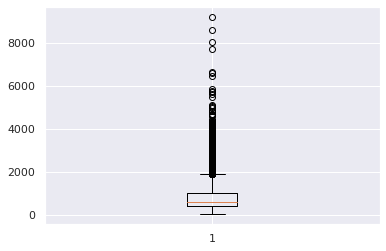

In [41]:
# Find avergae review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

# boxplot for review length
plt.boxplot(result)
plt.show()

**Average review length = 828 words**

**Draw a word cloud to see the most frequently appeared keywords**

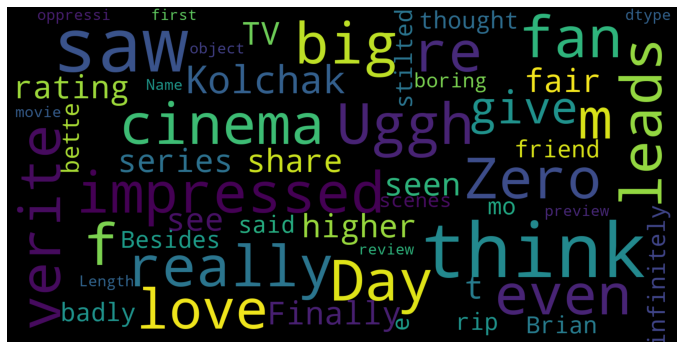

In [42]:
# creating a word-cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=300,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df_train_merged["review"])

Some words from the figure above don't give us much information about users' feelings. We can add those words to a list of stopwords and draw an updated word cloud. <br>

In [43]:
to_remove = set(['Ja', 'dtype', 'keep', 'object','B', 'Hollywood', 'Based', 'still', 'wants', 'ha', 'thing', 'th', 'video', 'would', 'get', 'see', 'get', 'know'])
stopwords.update(to_remove)

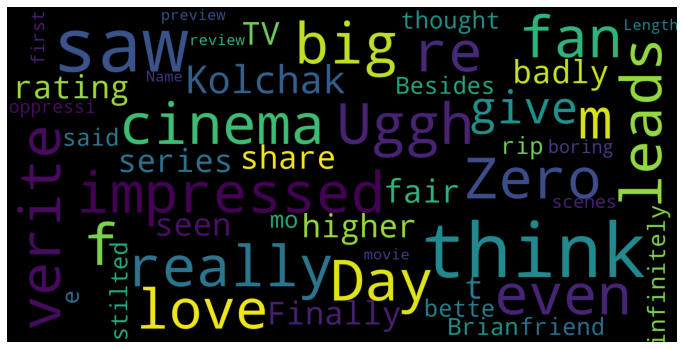

In [44]:
def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=300,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df_train_merged["review"])

**N-Gram Analysis to see which words appear together frequently**

In [45]:
# Join all the reviews as one string
texts = ' '.join(df_merged['review'])

In [46]:
string = texts.split(" ")
print(string)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Define a function to create and draw an N-gram from NLTK N-grams** <br>
Reference: https://github.com/072arushi/Movie_review_analysis/blob/main/my_project%20(1).ipynb


In [47]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (8,5))
    return sns.barplot(x='count',y='word', data=n_gram_df,color ='darkcyan', )

       word  count
0  (movie,)  81997
1   (film,)  74644
2    (one,)  50355
3   (like,)  38756
4   (good,)  28574


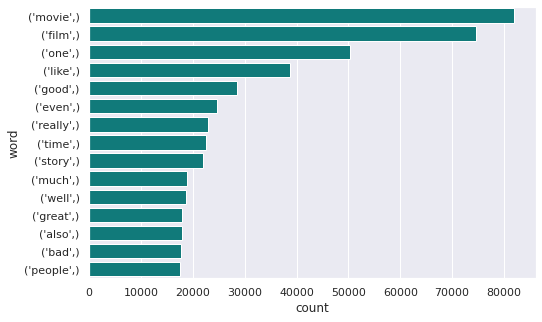

In [48]:
#Unigram
draw_n_gram(string,1)

                 word  count
0        (ever, seen)   2527
1         (ive, seen)   2193
2  (special, effects)   2136
3      (even, though)   1940
4         (one, best)   1857


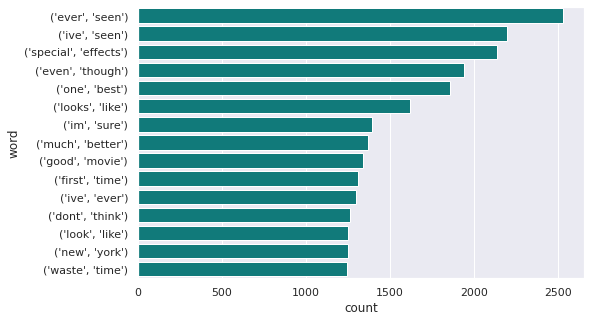

In [49]:
#Bigram
draw_n_gram(string,2)

                   word  count
0     (ive, ever, seen)    981
1  (worst, movie, ever)    352
2   (dont, waste, time)    313
3  (one, worst, movies)    301
4   (movie, ever, seen)    299


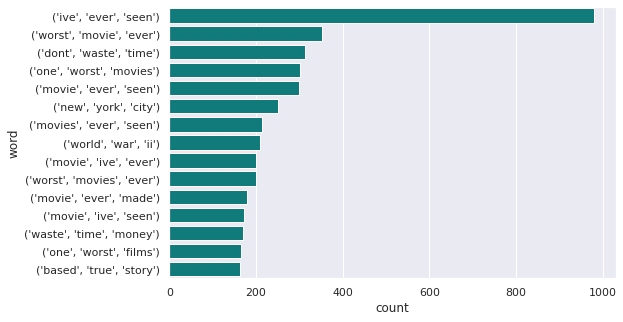

In [50]:
#Trigram
draw_n_gram(string,3)

**Train Test Split** <br>
80% data (40k samples) for training <br>
20% data (10k samples) for testing <br>

In [53]:
X_train = X[0:40000 ,:]
X_test = X[40000:50000,: ]
y_train = y[0:40000]
y_test = y[40000:50000]

In [54]:
# Check size
print("Training data: ")
print(X_train.shape)
print(y_train.shape)

Training data: 
(40000, 182431)
(40000,)


# **Modeling**

In [55]:
# Create lists to store accuracy, precision, recall, F1 score and training time for every algorithm
accuracy_list = []
precision_list = []
recall_list = []
fscore_list = []
time_list = []

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, model_selection, svm
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score
import time

**Random Forest Classifier**

In [58]:
# Initialize the classifier
rf = RandomForestClassifier(n_jobs = -1, random_state =1)
start_time = time.time()
# Train the model on training dataset
rf.fit(X_train, y_train)
# Make binary predictions on testing dataset
y_pred = rf.predict(X_test)
end_time = time.time()
rf_time = end_time - start_time
# Stop the timer and append the time to the time list
time_list.append(rf_time)

RandomForestClassifier(n_jobs=1, random_state=1)

Text(0.5, 12.5, 'true labels')

Text(80.90000000000006, 0.5, 'predicted label')

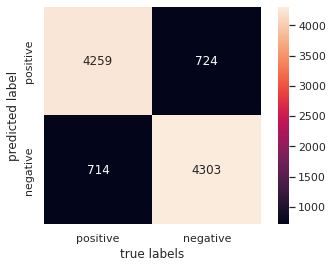

The accuracy is 0.8562


In [59]:
# Draw a confusion matrix with a heatmap
text_categories = ['positive', 'negative']
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=text_categories, yticklabels=text_categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
# Find the accuracy and append it to the accuracy list
print("The accuracy is {}".format(accuracy_score(y_test, y_pred)))
accuracy_list.append(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


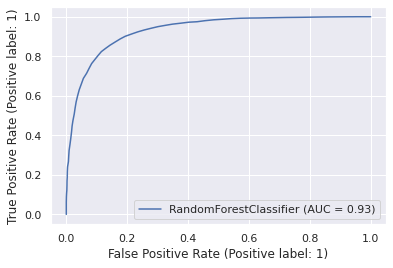

In [62]:
# Plot ROC curve
metrics.plot_roc_curve(rf, X_test, y_test) 
plt.show()

In [60]:
# Find precision, recall and F1 score and append them to the respective lists
score = precision_recall_fscore_support(y_test, y_pred, average='binary')
precision_Rf = score[0]
precision_list.append(precision_Rf)
recall_Rf = score[1]
recall_list.append(recall_Rf)
fscore_Rf = score[2]
fscore_list.append(fscore_Rf)

**SVM**

In [63]:
# SVM Classifier
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
start_time = time.time()
SVM.fit(X_train, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
end_time = time.time()
svm_time = end_time - start_time
time_list.append(svm_time)
# Use accuracy_score function to get the accuracy and append it to the accuracy list
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test))
accuracy_list.append(accuracy_score(predictions_SVM, y_test))

SVC(gamma='auto', kernel='linear')

SVM Accuracy Score ->  0.8963


Text(0.5, 12.5, 'true labels')

Text(80.90000000000006, 0.5, 'predicted label')

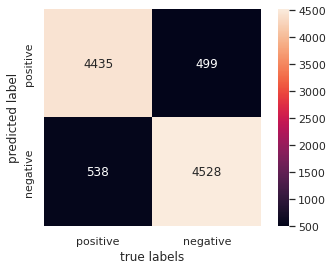

The accuracy is 0.8963


In [65]:
mat = confusion_matrix(y_test, predictions_SVM)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=text_categories,yticklabels=text_categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predictions_SVM)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


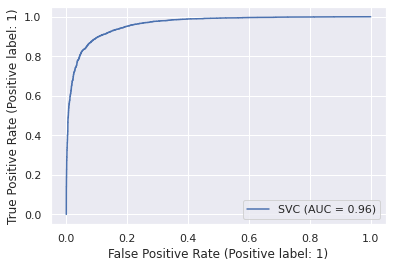

In [64]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(SVM, X_test, y_test)
plt.show()

In [66]:
# Find precision, recall and F1 score and append them to the respective lists
score = precision_recall_fscore_support(y_test, predictions_SVM, average='binary')
precision_SVM = score[0]
precision_list.append(precision_SVM)
recall_SVM = score[1]
recall_list.append(recall_SVM)
fscore_SVM = score[2]
fscore_list.append(fscore_SVM)

**Naive Bayes**

In [68]:
from sklearn.naive_bayes import BernoulliNB

# Build the model
nb = BernoulliNB()
start_time = time.time()
nb.fit(X_train, y_train)
# Predict the categories of the test data
predictions_nb = nb.predict(X_test)
end_time = time.time()
nb_time = end_time - start_time
time_list.append(nb_time)

BernoulliNB()

Text(0.5, 12.5, 'true labels')

Text(80.90000000000006, 0.5, 'predicted label')

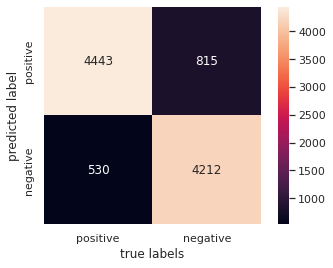

The accuracy is 0.8655


In [69]:
# Plot a confusion matrix with heatmap
mat = confusion_matrix(y_test, predictions_nb)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=text_categories,yticklabels=text_categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predictions_nb)))
accuracy_list.append(accuracy_score(y_test, predictions_nb))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


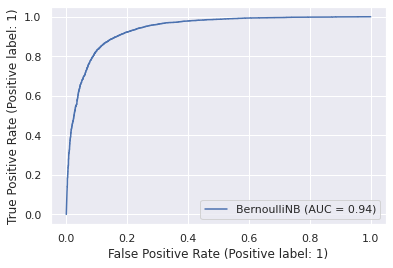

In [72]:
# Plot ROC curve
metrics.plot_roc_curve(nb, X_test, y_test) 
plt.show()

In [70]:
# Find precision, recall and F1 score and append them to the respective lists
score = precision_recall_fscore_support(y_test, predictions_nb, average='binary')
precision_NB = score[0]
precision_list.append(precision_NB)
recall_NB = score[1]
recall_list.append(recall_NB)
fscore_NB = score[2]
fscore_list.append(fscore_NB)

**KNN**

In [73]:
#Building the KNN Model 
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=20)
start_time = time.time()
model_knn.fit(X_train, y_train)
#making predictions
predictions_knn = model_knn.predict(X_test)
end_time = time.time()
knn_time = end_time - start_time
time_list.append(knn_time)
#Find accuracy and append it to the accuracy list
print("Model Accuracy : {}%".format(accuracy_score(y_test, predictions_knn)))
accuracy_list.append(accuracy_score(y_test, predictions_knn))

KNeighborsClassifier(n_neighbors=20)

Model Accuracy : 0.7971%


Text(0.5, 12.5, 'true labels')

Text(80.90000000000006, 0.5, 'predicted label')

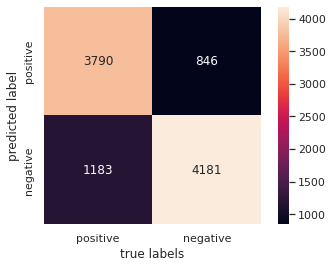

The accuracy is 0.7971


In [74]:
# Build a confusion matrix with heatmap
mat = confusion_matrix(y_test, predictions_knn)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=text_categories,yticklabels=text_categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predictions_knn)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


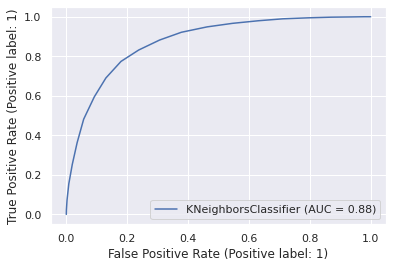

In [77]:
# plot ROC curve
metrics.plot_roc_curve(model_knn, X_test, y_test) 
plt.show()

In [75]:
# Find precision, recall and F1 score and append them to the respective lists
score = precision_recall_fscore_support(y_test, predictions_knn, average='binary')
precision_KNN = score[0]
precision_list.append(precision_KNN)
recall_KNN = score[1]
recall_list.append(recall_KNN)
fscore_KNN = score[2]
fscore_list.append(fscore_KNN)

**Logistic Regression**

In [78]:
# building Logistic Regression Model
from sklearn import linear_model
model_lr = linear_model.LogisticRegression()
start_time = time.time()
model_lr.fit(X_train, y_train)
#making predictions
predictions_lr= model_lr.predict(X_test)
end_time = time.time()
lr_time = end_time - start_time
time_list.append(lr_time)
#Find accuracy and append to the accuracy list
print("Model Accuracy : {}%".format(accuracy_score(y_test, predictions_lr)))
accuracy_list.append(accuracy_score(y_test, predictions_lr))

LogisticRegression()

Model Accuracy : 0.891%


Text(0.5, 12.5, 'true labels')

Text(80.90000000000006, 0.5, 'predicted label')

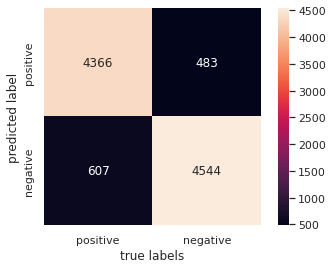

The accuracy is 0.891


In [79]:
# Draw a confusion matrix with heatmap
mat = confusion_matrix(y_test, predictions_lr)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=text_categories,yticklabels=text_categories)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("The accuracy is {}".format(accuracy_score(y_test, predictions_lr)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


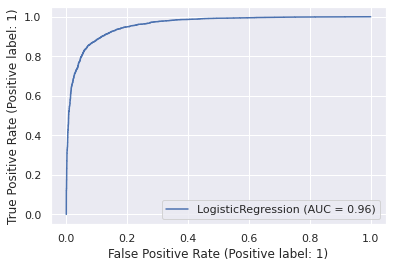

In [82]:
# Plot ROC curve
metrics.plot_roc_curve(model_lr, X_test, y_test) 
plt.show()

In [80]:
# Find precision, recall and F1 score and append them to the respective lists
score = precision_recall_fscore_support(y_test, predictions_lr, average='binary')
precision_LR = score[0]
precision_list.append(precision_LR)
recall_LR = score[1]
recall_list.append(recall_LR)
fscore_LR = score[2]
fscore_list.append(fscore_LR)

**Print Accuracy List**

In [84]:
accuracy_list

[0.8562, 0.8963, 0.8655, 0.7971, 0.891]

**Print Precision List**

In [85]:
precision_list

[0.8576838748255929,
 0.8938018160284248,
 0.8882328131590046,
 0.7794556301267711,
 0.8821588041157057]

**Print Recall List**

In [86]:
recall_list

[0.8559777203103243,
 0.9007360254625025,
 0.8378754724487766,
 0.8317087726278098,
 0.9039188382733241]

**Print F1 Score List**

In [87]:
fscore_list

[0.8568299482277978,
 0.8972555236302387,
 0.862319582352339,
 0.8047348667115775,
 0.892906268422087]

**Print Training Time List**

In [88]:
time_list

[365.1836416721344,
 2352.2167160511017,
 0.1604769229888916,
 40.60876226425171,
 15.421560287475586]

**List of all the algorithms above**

In [89]:
algo_list = ['Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Logistic Regression']

**Plot F1 Score**

<BarContainer object of 5 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'F1 Score')

Text(0.5, 1.0, 'F1 Score Comparison')

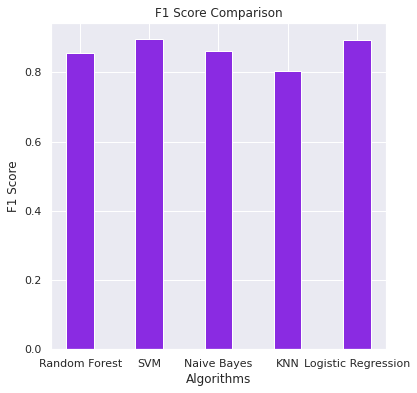

In [90]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(algo_list, fscore_list,
        color ='blueviolet',
        width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison")
plt.show()

**Plot Precision**

<BarContainer object of 5 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Comparison')

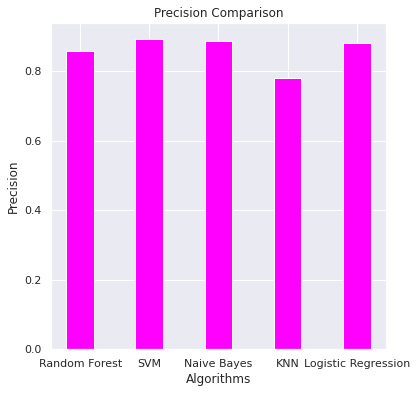

In [91]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(algo_list, precision_list, 
        color ='magenta',
        width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.title("Precision Comparison")
plt.show()

**Plot Recall**

<BarContainer object of 5 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'Recall Score')

Text(0.5, 1.0, 'Recall Comparison')

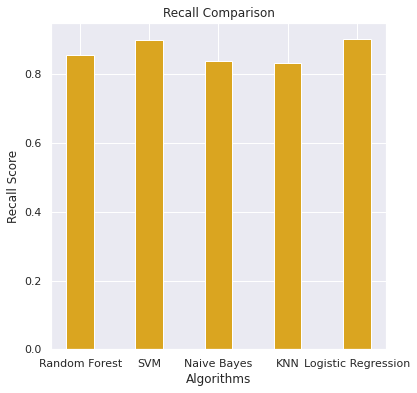

In [92]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(algo_list, recall_list, 
        color ='goldenrod',
        width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Recall Score")
plt.title("Recall Comparison")
plt.show()

**Plot Accuracy**

<BarContainer object of 5 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy Comparison')

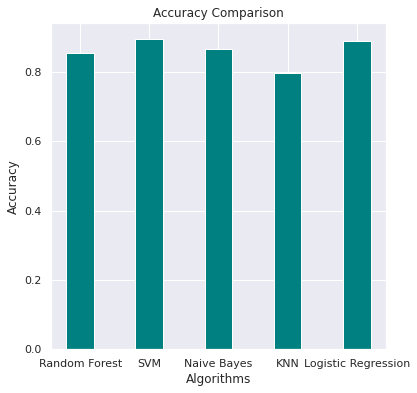

In [93]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(algo_list, accuracy_list, color ='teal',
        width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

**Plot Training time**

<BarContainer object of 5 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'Training Time')

Text(0.5, 1.0, 'Training & Prediction Time Comparison')

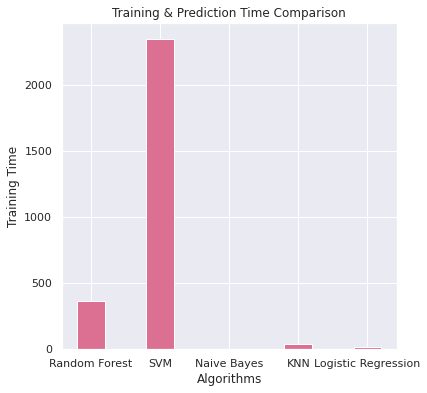

In [94]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(algo_list, time_list,
        color ='palevioletred', width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Training Time")
plt.title("Training & Prediction Time Comparison")
plt.show()

# **Additional Work - Deep Learning Models**

**Deep Learning Models** <br>
Reference code: https://github.com/072arushi/Movie_review_analysis

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras_preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [104]:
# Create lists for algorithms and their accuracies
accuracy_list_dl = []
algo_list_dl = ['CNN', 'LSTM']

**Convolutional Neural Network**

In [105]:
# CNN MODEL
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_merged.review)
embedding_dim = 50
maxlen = 150

# train test Split
x_train, x_test, y_train, y_test = train_test_split(df_merged['review'], df_merged['sentiment'],test_size=0.2, random_state=0)
# test validation split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,test_size=0.1, random_state=0)

# tokenization of input training data
x_train1 = tokenizer.texts_to_sequences(x_train)
x_valid1 = tokenizer.texts_to_sequences(x_valid)
x_test1 = tokenizer.texts_to_sequences(x_test)

x_train1 = pad_sequences(x_train1, padding='post', maxlen=maxlen)
x_valid1 = pad_sequences(x_valid1, padding='post', maxlen=maxlen)
x_test1 = pad_sequences(x_test1, padding='post', maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

# create layers for CNN
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 50)           9182200   
                                                                 
 conv1d (Conv1D)             (None, 150, 32)           4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 75, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 75, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 37, 32)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 37, 32)            3

In [106]:
# Train the CNN model
model.fit(x_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(x_valid1,y_valid),callbacks=[callback])

Epoch 1/10
141/141 [==============================] - 35s 237ms/step - loss: 0.6148 - accuracy: 0.6273 - val_loss: 0.5587 - val_accuracy: 0.6728
Epoch 2/10
141/141 [==============================] - 33s 232ms/step - loss: 0.5405 - accuracy: 0.6856 - val_loss: 0.5509 - val_accuracy: 0.6778
Epoch 3/10
141/141 [==============================] - 33s 233ms/step - loss: 0.5219 - accuracy: 0.6959 - val_loss: 0.5516 - val_accuracy: 0.6768
Epoch 4/10
141/141 [==============================] - 33s 237ms/step - loss: 0.5032 - accuracy: 0.7063 - val_loss: 0.5544 - val_accuracy: 0.6770


In [107]:
# Binary prediction
predict_x=model.predict(x_test1) 
classes_x=np.argmax(predict_x,axis=1)
accuracy_list_dl.append(accuracy_score(classes_x, y_test))
print(f'Accuracy = {accuracy_score(classes_x, y_test)}')

313/313 [==============================] - 2s 6ms/step
Accuracy = 0.1033


**LSTM Model**

In [108]:
# LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df_merged.review)
embedding_dim = 50
maxlen = 150

# train test Split
x_train, x_test, y_train, y_test = train_test_split(df_merged['review'], df_merged['sentiment'],test_size=0.2, random_state=0)
# test validation split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,test_size=0.1, random_state=0)

# tokenize the input training data
x_train1 = tokenizer.texts_to_sequences(x_train)
x_valid1 = tokenizer.texts_to_sequences(x_valid)
x_test1 = tokenizer.texts_to_sequences(x_test)

x_train1 = pad_sequences(x_train1, padding='post', maxlen=maxlen)
x_valid1 = pad_sequences(x_valid1, padding='post', maxlen=maxlen)
x_test1 = pad_sequences(x_test1, padding='post', maxlen=maxlen)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
embedding_vecor_length = 32
callback = EarlyStopping(monitor='val_loss', patience=2)

# Create layers for LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 50)           9182200   
                                                                 
 conv1d_3 (Conv1D)           (None, 150, 32)           4832      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 75, 32)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 75, 32)            3104      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 37, 32)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 32)           

In [109]:
# Train the model
model.fit(x_train1, y_train, epochs=10, batch_size=256,verbose = 1,validation_data=(x_valid1,y_valid),callbacks=[callback])

Epoch 1/10
141/141 [==============================] - 49s 325ms/step - loss: 0.4502 - accuracy: 0.7618 - val_loss: 0.3055 - val_accuracy: 0.8683
Epoch 2/10
141/141 [==============================] - 42s 300ms/step - loss: 0.2407 - accuracy: 0.9060 - val_loss: 0.3016 - val_accuracy: 0.8735
Epoch 3/10
141/141 [==============================] - 44s 310ms/step - loss: 0.1780 - accuracy: 0.9346 - val_loss: 0.3339 - val_accuracy: 0.8727
Epoch 4/10
141/141 [==============================] - 42s 295ms/step - loss: 0.1100 - accuracy: 0.9627 - val_loss: 0.3563 - val_accuracy: 0.8662


In [110]:
# Binary prediction
predict_x=model.predict(x_test1) 
classes_x=np.argmax(predict_x,axis=1)
accuracy_list_dl.append(accuracy_score(classes_x, y_test))
print(f'Accuracy = {accuracy_score(classes_x, y_test)}')

313/313 [==============================] - 4s 12ms/step
Accuracy = 0.4942


<BarContainer object of 2 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy Comparison')

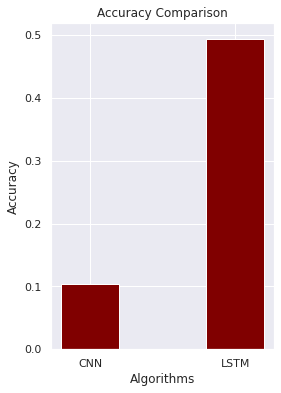

In [111]:
# Comparison of neural networks - based approach
fig = plt.figure(figsize = (4, 6))
# creating the bar plot
plt.bar(algo_list_dl, accuracy_list_dl,
        color ='maroon', width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

Deep learning models are giving very poor accuracy as compared to machine learning models.

# **Additional work - Multiclass Classification - Rating Prediction** <br>

**Create output training and testing features**

In [95]:
y_train_multi = df_merged['rating']
y_train_multi = y_train_multi[0:40000]

In [96]:
y_test_multi = df_merged['rating']
y_test_multi = y_test_multi[40000:50000]

In [97]:
# Create lists for accuracy
accuracy_list_multi = []
time_list_multi = []

**Random Forest Classifier - Multiclass**

In [99]:
# Initialize a classifier
rf_multi = RandomForestClassifier(n_estimators=100, n_jobs = -1, random_state = 1)
start_time = time.time()
rf_multi.fit(X_train, y_train_multi)
# making predictions
y_pred_multi = rf_multi.predict(X_test)
end_time = time.time()
rf_multi_time = end_time - start_time
time_list_multi.append(rf_multi_time)
# model accuracy
print("Model Accuracy : {}%".format((y_pred_multi == y_test_multi).mean()))
accuracy_list_multi.append((y_pred_multi == y_test_multi).mean())

RandomForestClassifier(n_jobs=-1, random_state=1)

Model Accuracy : 0.3823%


**SVM - Multiclass**

In [100]:
# fit the training dataset on the classifier
SVM_multi = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
start_time = time.time()
SVM_multi.fit(X_train, y_train_multi)
# predict the labels on validation dataset
predictions_SVM_multi = SVM_multi.predict(X_test)
end_time = time.time()
svm_multi_time = end_time - start_time
time_list_multi.append(svm_multi_time)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM_multi, y_test_multi))
accuracy_list_multi.append(accuracy_score(predictions_SVM_multi, y_test_multi))

SVC(gamma='auto', kernel='linear')

SVM Accuracy Score ->  0.4452


**Multinominal Naive Bayes**

In [101]:
from sklearn.naive_bayes import MultinomialNB
# fit the training dataset on the classifier
clf = MultinomialNB()
start_time = time.time()
clf.fit(X_train, y_train_multi)
# predict the labels on validation dataset
predictions_clf = clf.predict(X_test)
end_time = time.time()
clf_multi_time = end_time - start_time
time_list_multi.append(clf_multi_time)
# Use accuracy_score function to get the accuracy
print("MultinomialNB Accuracy Score -> ",accuracy_score(predictions_clf, y_test_multi))
accuracy_list_multi.append(accuracy_score(predictions_clf, y_test_multi))

MultinomialNB()

MultinomialNB Accuracy Score ->  0.3656


In [112]:
accuracy_list_multi

[0.3823, 0.4452, 0.3656]

<BarContainer object of 3 artists>

Text(0.5, 0, 'Algorithms')

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Accuracy Comparison')

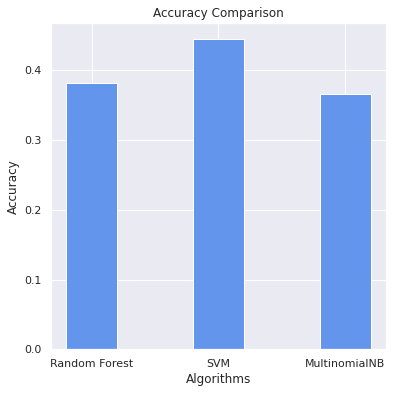

In [102]:
# Plot accuracy for each of the above algorithms used in multiclass classification
algo_list_multi = ['Random Forest', 'SVM','MultinomialNB']

fig = plt.figure(figsize = (6, 6))
# creating the bar plot
plt.bar(algo_list_multi, accuracy_list_multi,
        color ='cornflowerblue', width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

**Multiclass classification is not performing as good as binary classification**